In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker

import pickle
import copy
import numpy as np
import pandas as pd


%load_ext autoreload
%autoreload 2
#%load_ext nb_black

# Load results

In [6]:
results_dir = '../results/'
datasets = ['MNIST','Fashion_MNIST','CIFAR']
results_paths = [results_dir + dataset + '_results.dic' for dataset in datasets]

In [7]:
results = {}
for path in results_paths:
    dataset_results = pickle.load(open(path,'rb'))
    results = dict(results,**dataset_results)

# Visualization

In [8]:
def get_ylim(results_dic,dataset,data_names,log):
    list_train = []
    list_test = []
    for optimizer,data in results_dic[dataset].items():
        list_train.append(data[data_names[0]])
        list_test.append(data[data_names[1]])
    
    list_train = np.array(list_train)
    list_test = np.array(list_test)
    
    ymax = max([np.max(list_train),np.max(list_test)])
    ymin = min([np.min(list_train),np.min(list_test)])
    
    if log:
        y_ticks = np.round(np.logspace(np.log(ymin),np.log(ymax),base = np.exp(1),num=4),2)
    else:
        y_ticks = np.round(np.linspace(ymin,ymax,num=4),2)
    
    return ymin, ymax, y_ticks

In [13]:
def plot(data_names,linestyles,datasets,results,log=False, sharex = False,figsize = (20,10)):
    n_rows = len(data_names)
    n_cols = len(datasets)
    
    fig, ax = plt.subplots(n_rows,n_cols,figsize = figsize ,sharex = sharex)
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    
    optimizers_names = list(results[datasets[-1]].keys())

    for i, dataset in enumerate(datasets):
        ymin, ymax, y_ticks = get_ylim(results,dataset,data_names,log)
        
        for j, optimizer in enumerate(optimizers_names):
            col = colors[j]
            for m, (data_col,ls) in enumerate(zip(data_names,linestyles)):
                data = results[dataset][optimizer][data_col]
                ax[m,i].plot(data,ls = ls,color = col)
                
        for k in reversed(range(len(ax[:,i]))):
            if log:
                ax[k,i].set_yscale('log')

            formatter = matplotlib.ticker.ScalarFormatter()
            formatter.set_powerlimits((-2,1))

            ax[k,i].yaxis.set_major_formatter(formatter)
            ax[k,i].yaxis.set_minor_locator(matplotlib.ticker.NullLocator())
            
            
            #ax[k,i].set_ylim([ymin,ymax])
            #ax[k,i].set_yticks(y_ticks)
            
            #if k == 0:
            ax[k,i].set_yticklabels([])
                
            ax[k,i].yaxis.tick_right()
            ax[k,i].grid()

            #ax[i,k].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    
    for axis,dataset in zip(ax[0],datasets):
        axis.set_title(dataset,size='xx-large')

    col_names = ['Loss','Accuracy']
    for axis, row in zip(ax[:,0], col_names):
        axis.set_ylabel(row, rotation=90, size='x-large')

    fig.legend(labels = optimizers_names,loc="lower center",bbox_to_anchor=(0.5105, 0.05),ncol=4)
    #fig.suptitle(title,size='xx-large',y=.95,x=0.517)
    
    return fig

## Training results

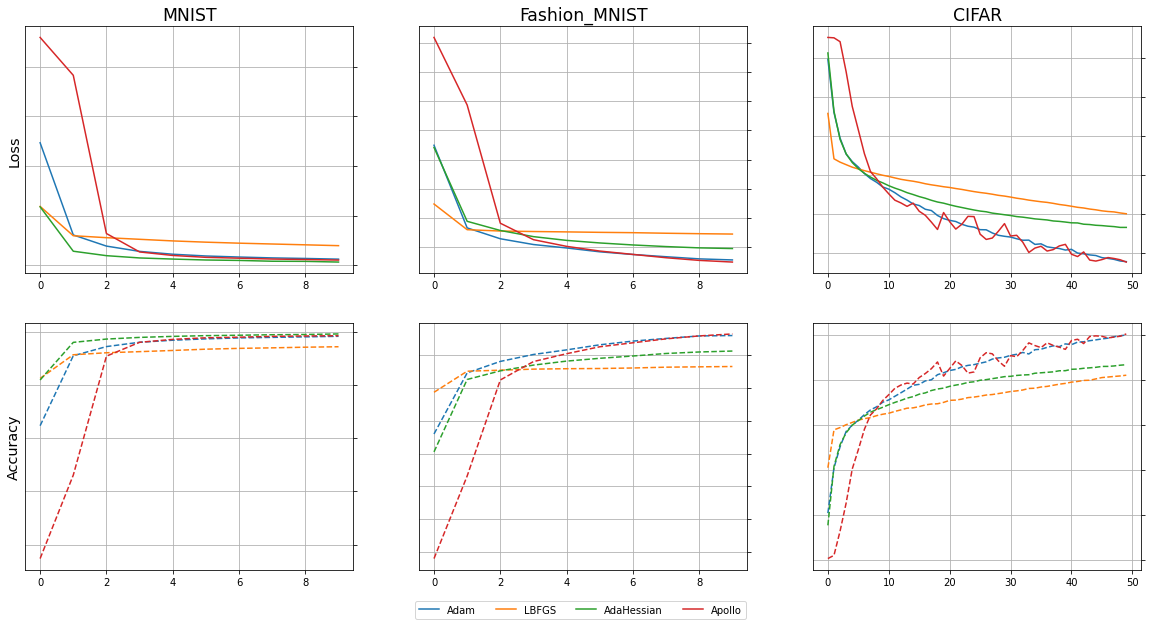

In [14]:
data_names = ['training_losses','training_accuracies']
linestyles = ['-','--']
datasets = ['MNIST','Fashion_MNIST','CIFAR'] 

figure = plot(data_names,linestyles,datasets,results)

plt.savefig("../results/TrainLossAcc.png")

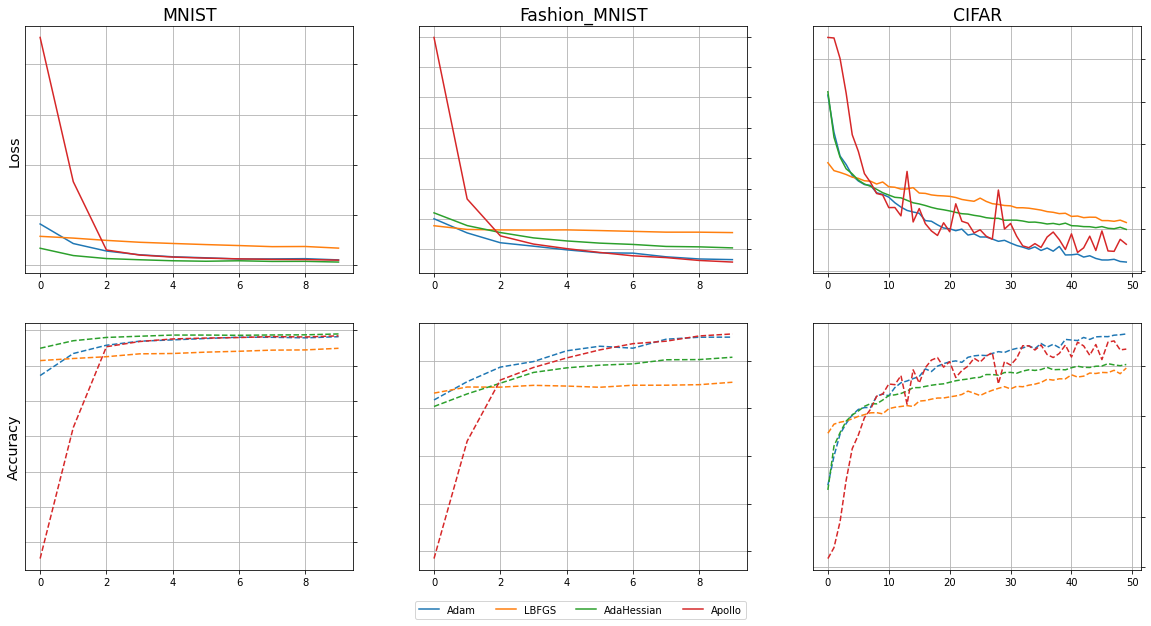

In [16]:
data_names = ['test_losses','test_accuracies']
linestyles = ['-','--']
datasets = ['MNIST','Fashion_MNIST','CIFAR'] 

figure = plot(data_names,linestyles,datasets,results,log = False)

plt.savefig("../results/TestLossAcc.png")